## Linear Regression (Part 1)

In this report it is aimed to describe and construct a linear regression model by using gradient descent approach. Linear regression method is a statistical method for predicting a contnious variable. Given the observed data, the aim of a linear regression is to fit a linear function in terms of dependnet variables into data such that the average of distance of observed values and predicted values is minimized. In fact,it is aimed to minimize 
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}))^{2}$$
where $$J(\theta)$$ is the cost function (or average of square of distances) and $$h_{\theta}(x)$$ is the linear model or hypothesis (the linear function that it is aimed to fit). The linear function form is $$\theta^{T}x = \theta_{0}+\theta_{1}x_{1}$$. 

Finding parametrs of linear function can be conducted in two manners of gradient descent and normal equation calculation. Linear regression can be constructed with respect to one variable or more although in this part I aim to fit a linear model with respect to one dependent variable using gradient descnet method. In gradient descent method in each iteration the parameters $$\theta_{i}$$ is upadated in the following manner where the $$\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}))x_{j}^{(i)}$$ is the gradient of cost function with respect to the $$ith$$ dependent variable. So in each step of iteration we have 
$$\theta_{j} := \theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}))x_{j}^{(i)}$$ where $$\alpha$$ is learning rate which is set by user.   

It should be noted that the learning rate usually is small to reduce the chance of overshooting for function that are not globally convex.

For constructing the linear regression model, we use the following data set to validate our procedure. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

In [2]:
data = pd.read_csv('./ex1data1.txt',sep=',',header = None)
data.columns = ['x','y']
print(data.head())

        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


By visualising data it can be seen that the assumption of linearity is a plausible. Thus a linear regression application does make sense in this case. 

Text(0,0.5,'Profit in $10,000')

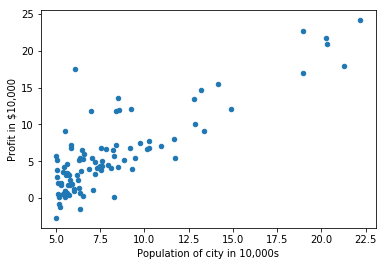

In [3]:
data.plot(kind='scatter',x='x',y='y')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')

For constructing the linear regression first task is adding a column of ones to the training matrix to represnt the column for intercept. Then computing the parameters of regression line using gradient descent method is the next step.

In [4]:
#ones_added = pd.DataFrame(np.ones((len(data.x),1)))
X_ones_added = data[['x']].copy()
X_ones_added['intercept'] = pd.Series(np.ones(len(data.x)))
X_ones_added = X_ones_added[['intercept','x']]
theta = np.zeros((1,2))
n_obs = len(data.x)
alpha = 0.01
iterations = 4500
def grad_desc(X_ones_added,theta,alpha,iterations,data):
    generated_theta = [theta]  
    learn_rate_co = alpha*(1/n_obs)
    for i in range(iterations):
        theta_extended = np.repeat(theta,n_obs,axis = 0).reshape(n_obs,2)
        temp = theta - learn_rate_co*np.asarray(((X_ones_added*theta_extended).sum(1)-data.loc[:,'y']).dot(X_ones_added))
        generated_theta.append(temp) 
        theta = temp
    return [theta,generated_theta]

In [5]:
lin_coeffs = grad_desc(X_ones_added,theta,alpha,iterations,data)
print(lin_coeffs[0])

[[-3.89459687  1.1929147 ]]


As it can be seen $-3.89459687$ represents the intercept and $1.1929147$ is slope of the regression line. In order to evaluate that the model is working correctly a cost function is implementd to calculate the cost for all values of thetas (hypothesis coefficient). To assess that gradient descent is working properly it should investigated that by iterating the gradient descent the cost function is reducing.     

In [6]:

def cost_func(theta_s,X_ones_added,data):
    n_obs = len(data.x)
    cost_values = []
    for i in range(iterations+1):
        theta_s_extended = np.repeat(theta_s[i],n_obs,axis=0).reshape(n_obs,2)
        cost =  (1/2*n_obs)*np.sum((np.asarray(((X_ones_added*theta_s_extended).sum(1)-data.loc[:,'y']))**2))
        cost_values.append(cost)
    return cost_values

costs = cost_func(lin_coeffs[1],X_ones_added,data) 

The following plot assert that the gradient descent method is working. In fact, the plot shows that the gradent descent is minimzing the cost function as it is itarating.  

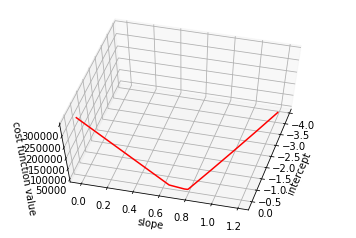

In [7]:
theta_s = np.asarray(lin_coeffs[1]).reshape(4501,2)
xi =  theta_s[:,:1]
yi =  theta_s[:,1:]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xi,yi,costs,color='red')
ax.set_xlabel('intercept')
ax.set_ylabel('slope')
ax.set_zlabel('cost function value')
ax.view_init(60, 15)


As the plot shows by iterating for all values of thetas over cost function it can be seen that cost function is reducing and converging to its minimum value. In order to check that the obtained parameters are meaningful we can fit the regression line into the data. Before fitting the line into data it is worth to check that cost function minimum is close to obtained value. Thus we aim to plot the contour of cost function. If we expand the cost function of regression line with one dependent variable into serires form  then we have

$\frac{1}{2}\theta_{0}^{2} + \frac{1}{2m}\theta_{1}^{2}\sum_{1}^{m}x_{i}^{2}+\frac{1}{m}\theta_{1}\theta_{0}\sum_{1}^{m}x_{i}-\frac{\theta_{0}}{m}\sum_{1}^{m}y_{i}-\frac{\theta_{1}}{m}\sum_{1}^{m} x_{i}y_{i}+\frac{1}{2m}\sum_{1}^{m}y_{i}^{2}$ 

and we can apply the above formula to calculate the cost function over a meshgird. The coeff_of_costfunc is the function that calculate the coefficients of the above formula. 

In [8]:
def coeff_of_costfunc(data):
    m = len(data.iloc[0]) 
    theta_1_sqr = (1/(2.0*m))*(data.iloc[0]**2).sum()
    thetaS_multip = (1/m)*data.iloc[0].sum()
    theta_0 = -1*(1/m)*data.iloc[1].sum()
    theta_1 = -1*(1/m)*(data.iloc[0].dot(data.iloc[1]))
    
    return (theta_1_sqr,thetaS_multip,theta_0,theta_1)

coeff_s = coeff_of_costfunc(data)
print(coeff_s)

(86.7029465025, 11.851049999999999, -7.328950000000001, -97.19663908499999)


If we want to plot the contour of cost function we can use this coefficients to calculate the cost function by applying meshgrid and then fit the obtained point into the contour. 

Text(0,0.5,'intercept')

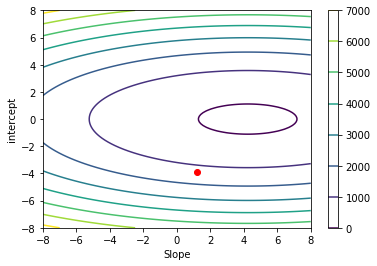

In [9]:
sum_of_Y_sqr = (1/2.0*len(data.iloc[0]))*(data.iloc[1]**2).sum()
intercept_range = np.linspace(-8,8,120) 
slope_range = np.linspace(-8,8,120)
sum_of_Y_sqr = np.repeat(sum_of_Y_sqr,120)
#
sum_of_Y_sqr_grid, sum_of_Y_sqr_grid= np.meshgrid(sum_of_Y_sqr,sum_of_Y_sqr)
inter_grid,slope_grid = np.meshgrid(intercept_range,slope_range)
costs_cont = (1/2)*inter_grid**2 + coeff_s[0]*slope_grid**2+\
coeff_s[1]*np.multiply(slope_range,inter_grid)+\
coeff_s[2]*(inter_grid)+\
coeff_s[3]*(slope_range)+\
sum_of_Y_sqr_grid


plt.contour(inter_grid,slope_grid,costs_cont)
plt.plot(1.1929147 ,-3.89459687,"ro")
plt.colorbar()
plt.xlabel('Slope')
plt.ylabel('intercept')

The red dot in the contour shows the obtained value which is pretty close to the minimum of cost function. Plotting the fitted line into the scatter plot shows that the gradient descent method was working correctly.

Text(0,0.5,'Profit in $10,000')

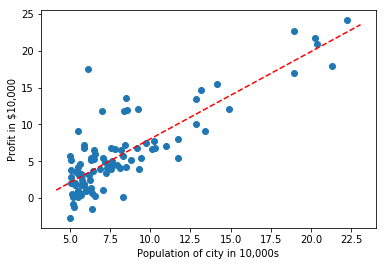

In [10]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--',color='r')

    
plt.scatter(data['x'],data['y'])
abline(1.188,-3.852)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')